# Draw plots with the data from given xlsx

In [9]:
import pandas as pd

china_tbl = pd.read_excel("trade_model2_130825_ind.xlsx")

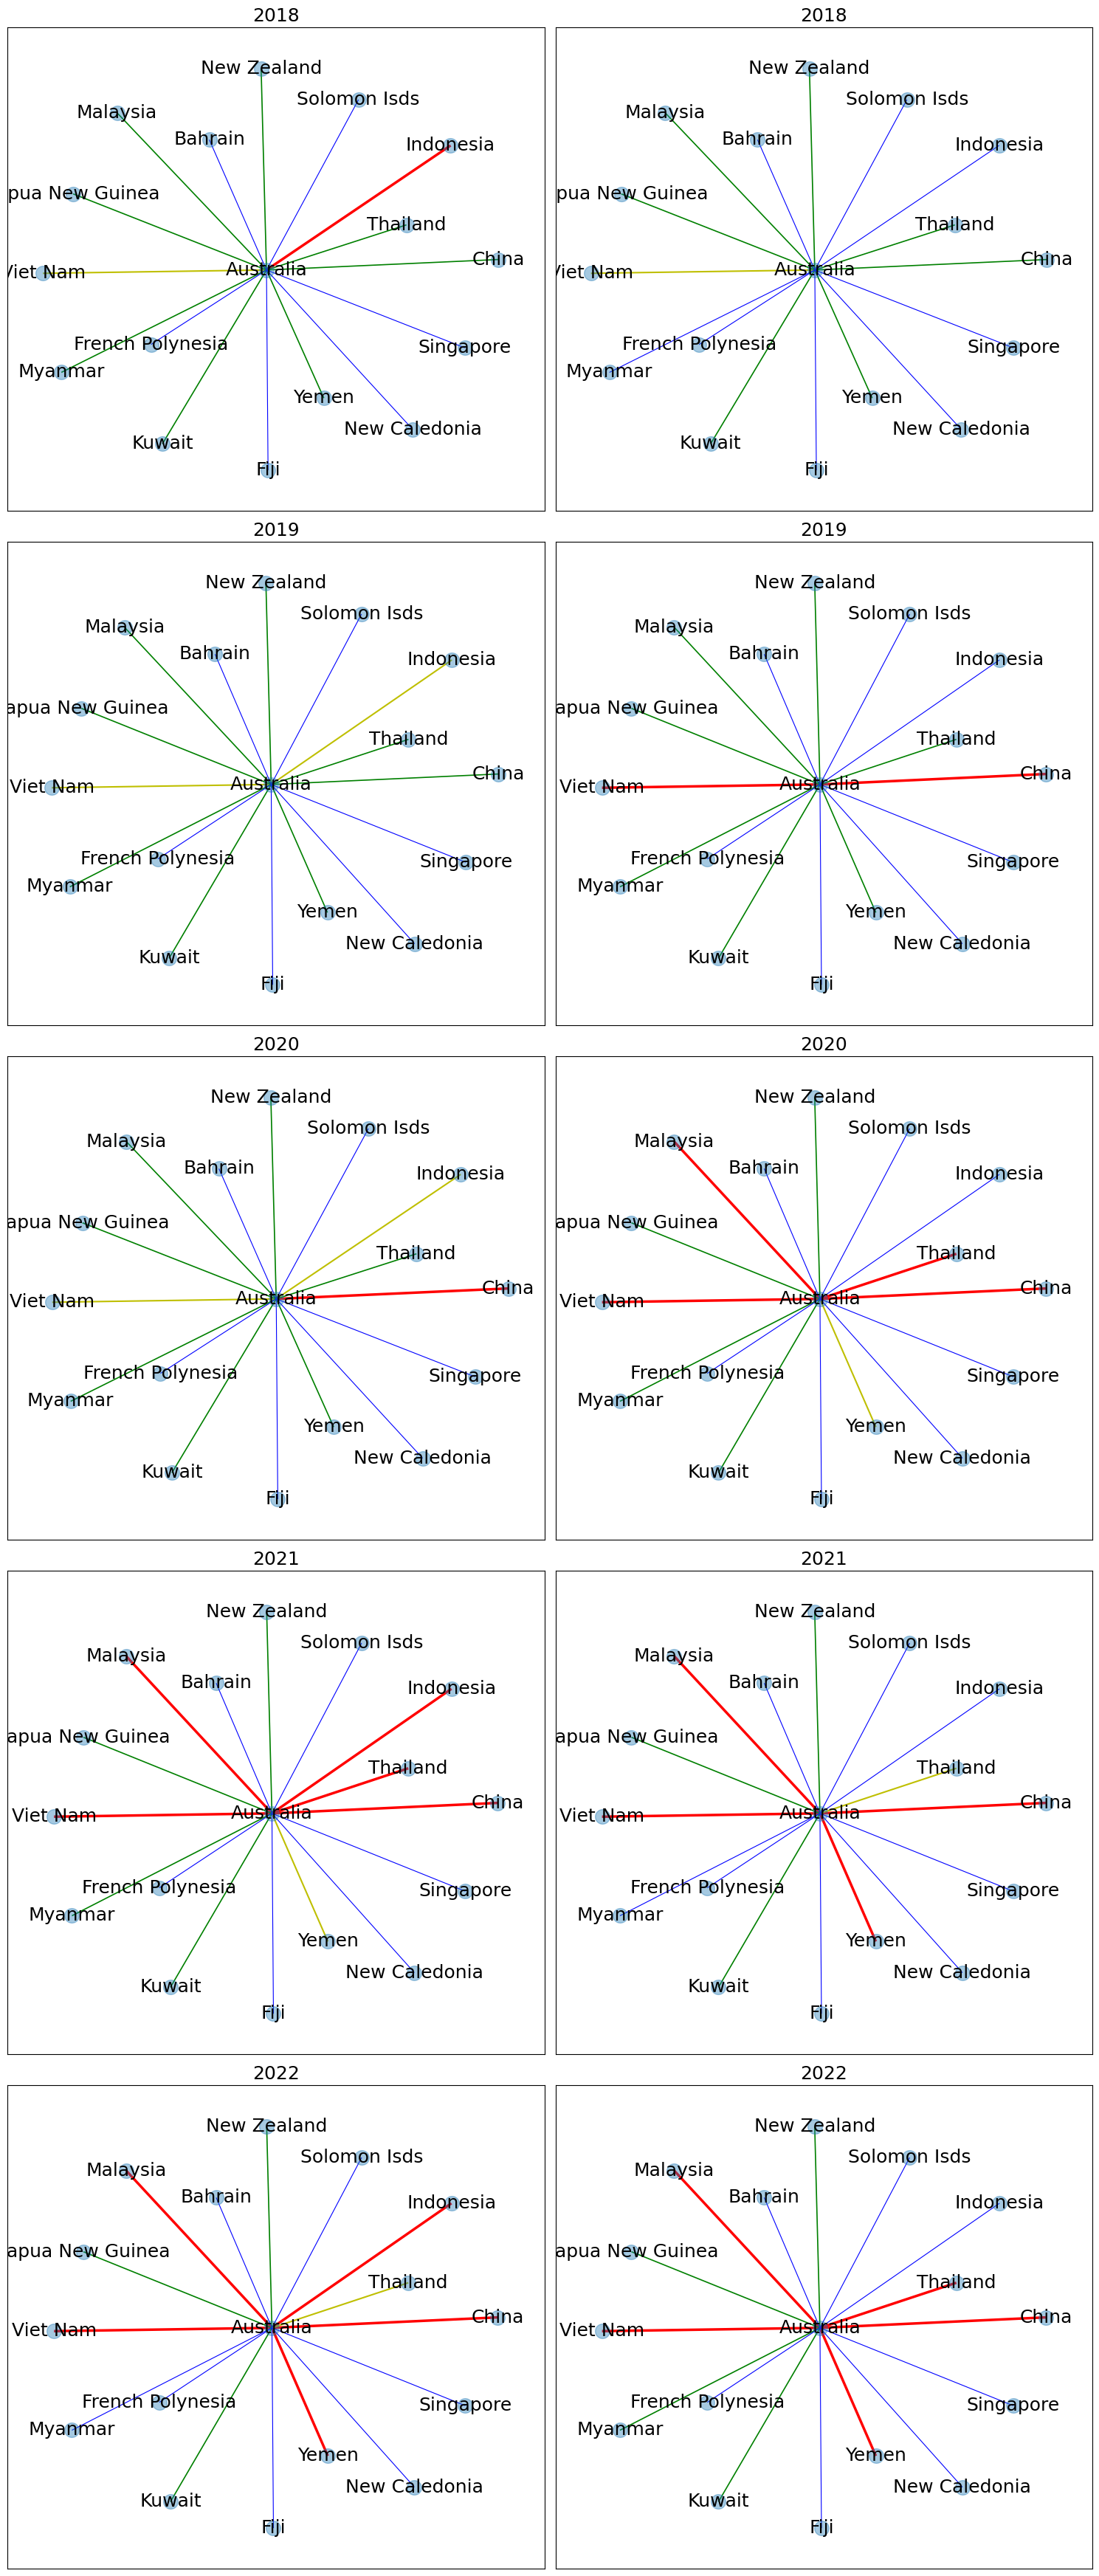

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

fig, axs = plt.subplots(5,2,figsize=(15, 35))

max_ = float(china_tbl["Unconstrained"].max())

year2graph = {}
for n in range(2):
    k = 0
    for t, vals in china_tbl.iterrows():
        year = vals['Year']

        if year not in year2graph:
            G1 = nx.Graph()
            G2 = nx.Graph()
            
            year2graph[year] = [G1,G2]
        
        year2graph[year][0].add_edge(vals['Exporter'], vals['Importer'], weight= float(vals["Unconstrained"]) / max_)
        year2graph[year][1].add_edge(vals['Exporter'], vals['Importer'], weight= float(vals["Constrained: Au->Ind"]) / max_)        
        

for y in year2graph:
    for n,G in enumerate(year2graph[y]):
            axs[y-2018,n].set_title(y,fontsize=18)
            elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.2]
            ealarge = [(u, v) for (u, v, d) in G.edges(data=True) if ((d["weight"] > 0.15) and (d["weight"] <= 0.2))]
            emed = [(u, v) for (u, v, d) in G.edges(data=True) if ((d["weight"] > 0.05) and (d["weight"] <= 0.15))]
            esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.05]
            layout = nx.spring_layout(G, seed=7,weight=None)
            #nx.draw(G, layout)
            nx.draw_networkx_nodes(G, layout, node_size=200,alpha=0.4,ax=axs[y-2018,n])
        
            # edges
            nx.draw_networkx_edges(G, layout, edgelist=elarge, width=2.5,alpha=1.0,edge_color="r",ax=axs[y-2018,n])
            nx.draw_networkx_edges(
                G, layout, edgelist=ealarge, width=1.5, alpha=1.0, edge_color="y",ax=axs[y-2018,n]
            )           
            nx.draw_networkx_edges(
                G, layout, edgelist=emed, width=1.2, alpha=1.0, edge_color="g",ax=axs[y-2018,n]
            )        
            nx.draw_networkx_edges(
                G, layout, edgelist=esmall, width=0.8, alpha=1.0, edge_color="b",ax=axs[y-2018,n]
            )
            
            # node labels
            nx.draw_networkx_labels(G, layout, font_size=18, font_family="sans-serif",ax=axs[y-2018,n])
            # edge weight labels
            #edge_labels = nx.get_edge_attributes(G, "weight")
        #nx.draw_networkx_edge_labels(G, layout, edge_labels,font_size=6)
plt.tight_layout()
plt.savefig("constrained_model_Indonesia.png")      
plt.show()   